# <center><h1 style = "color:navy;">Random forest algorithm</h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


## <h2 style="color:purple">1. Data Exploration</h2>

In [2]:
pd.ExcelFile("glass.xlsx").sheet_names

['Description', 'glass']

In [3]:
desc = pd.read_excel("glass.xlsx", sheet_name='Description', header=None)
desc

,0
0,Prepare a model for glass classification using...
1,Data Description:
2,RI : refractive index
3,Na: Sodium (unit measurement: weight percent i...
4,Mg: Magnesium
5,AI: Aluminum
6,Si: Silicon
7,K:Potassium
8,Ca: Calcium
9,Ba: Barium


In [4]:
for i in range(0,desc.shape[0]):
    print(desc.loc[i,0])

Prepare a model for glass classification using Random Forest
Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
nan
Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps


In [5]:
glass = pd.read_excel("glass.xlsx", sheet_name='glass')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
glass.shape

(214, 10)

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Our dataframe doesn't seem to have any null values

In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## <h2 style="color:purple">2. Data Visualization</h2>

#### <h3 style="color:midnightblue">Univariate Analysis</h3>

1. RI (refractive index)

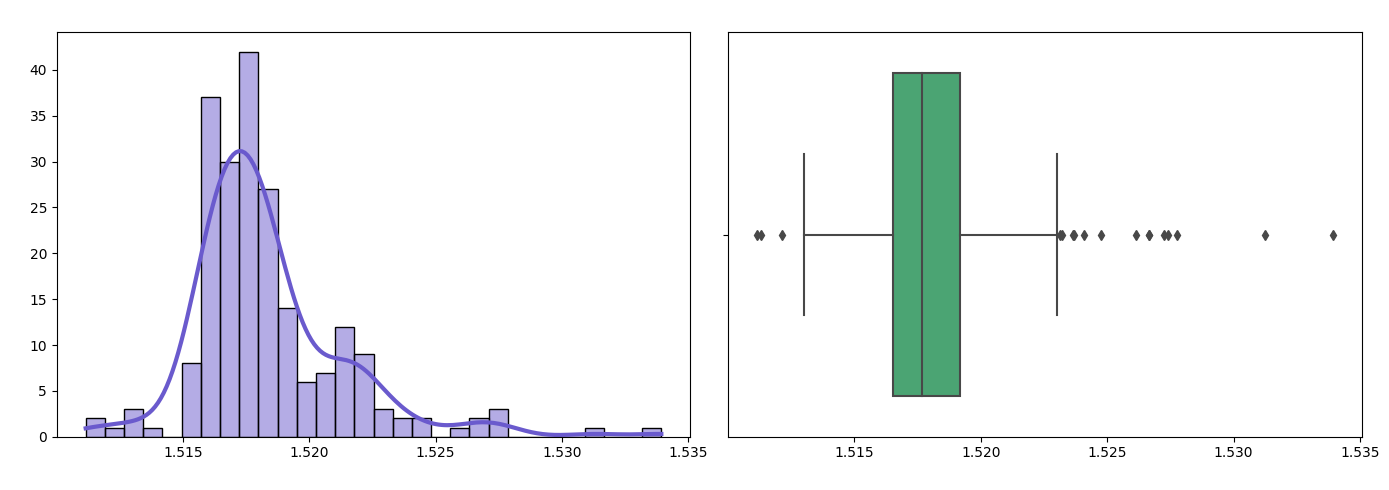

In [10]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['RI'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['RI'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


2. Na(Sodium)

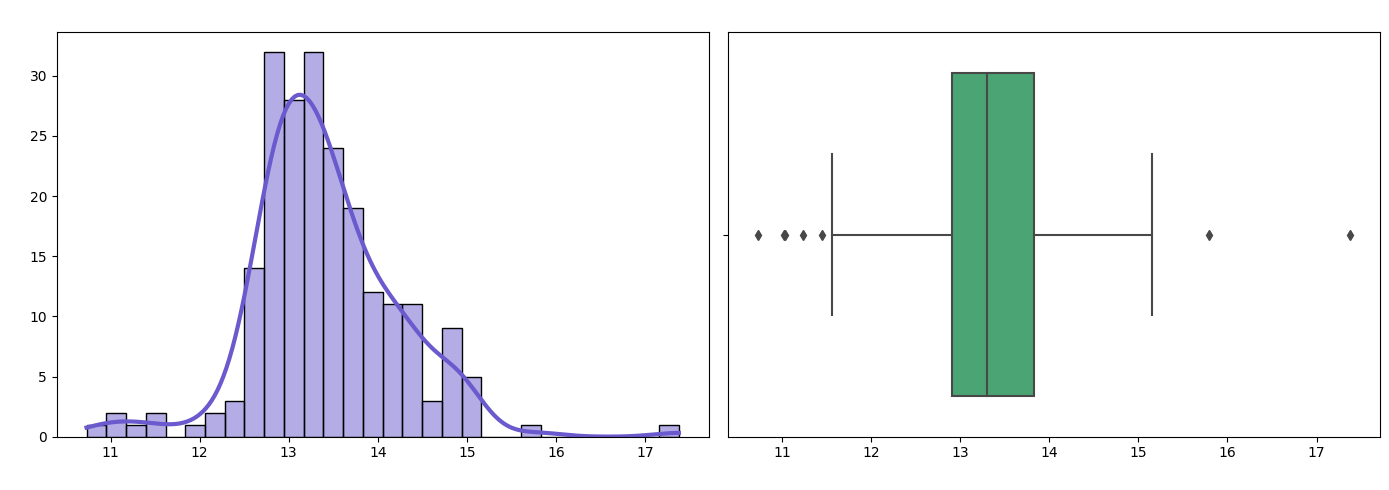

In [11]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Na'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Na'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


3.Mg(Magnesium)

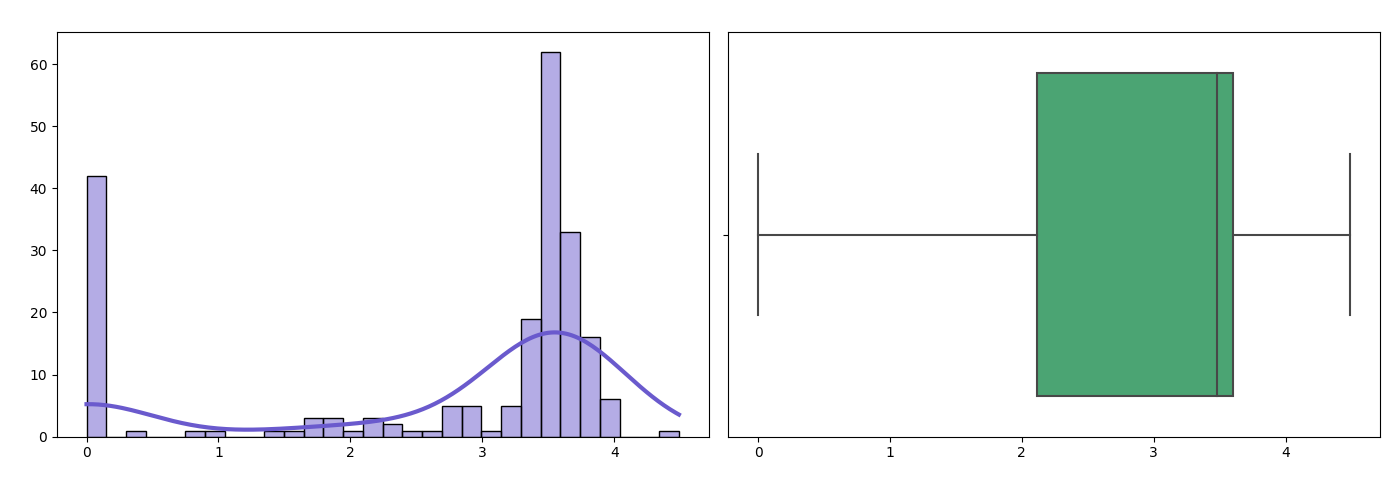

In [12]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Mg'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Mg'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


4. Al(Aluminium)

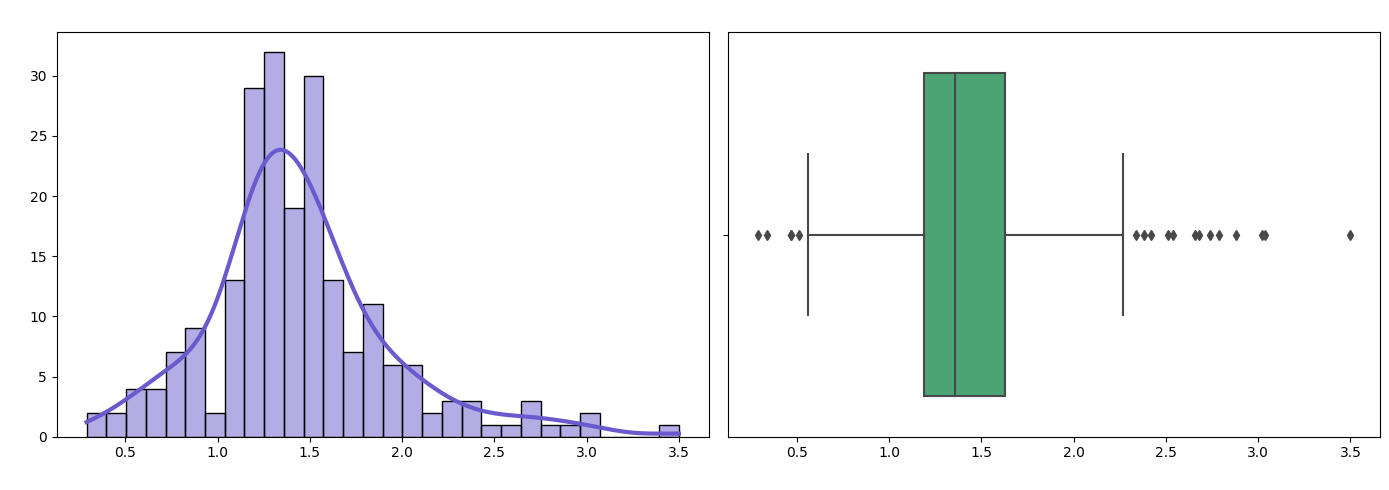

In [13]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Al'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Al'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


5. Si (Silicon)

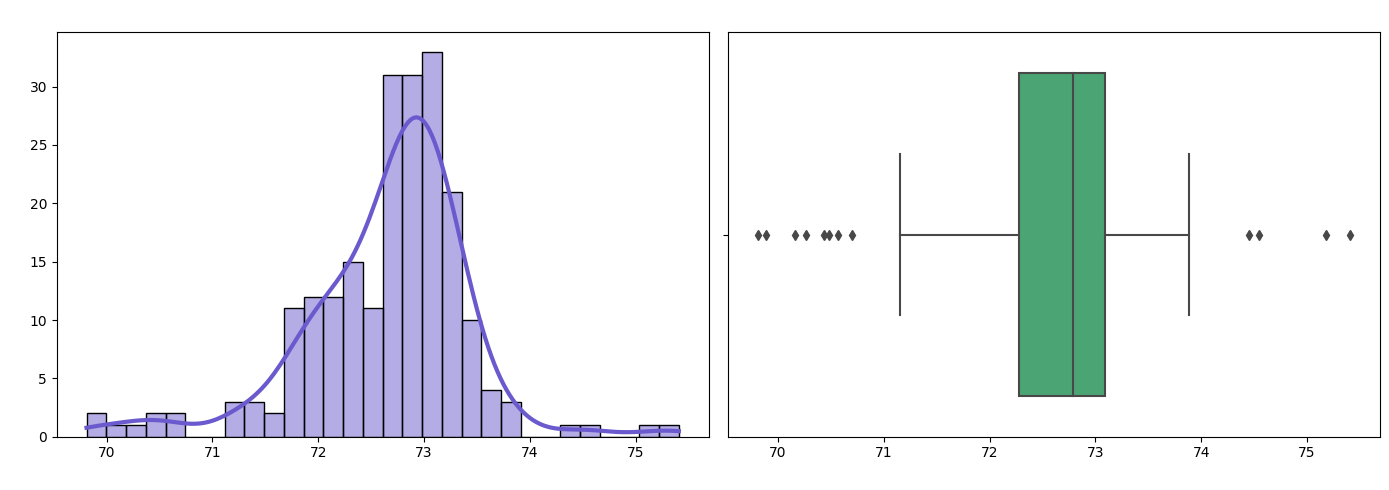

In [14]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Si'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Si'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


6. K(Potassium)

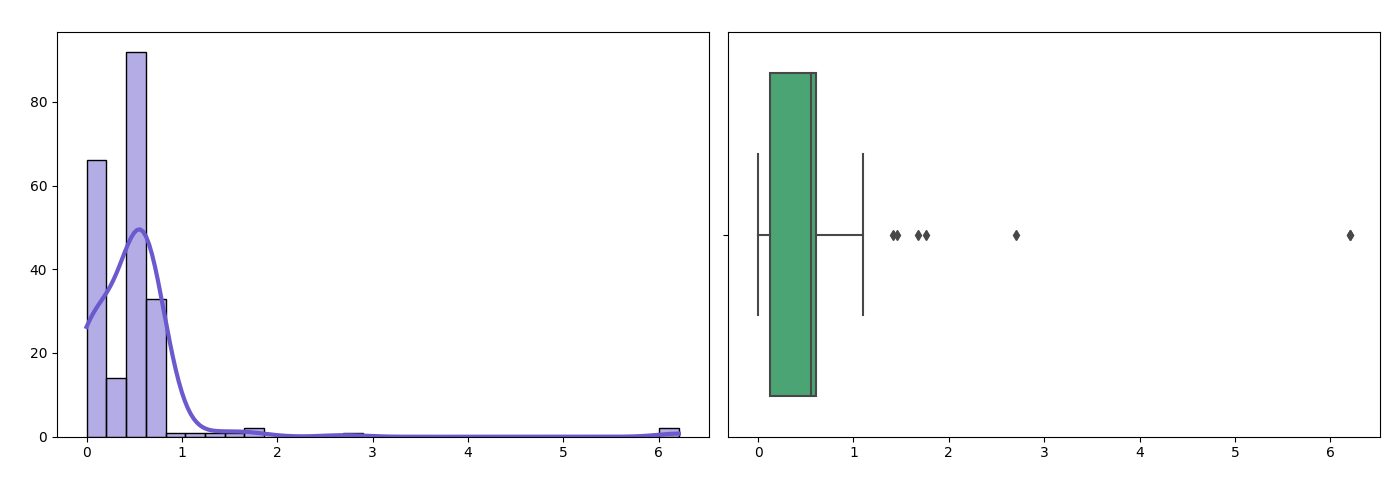

In [15]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['K'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['K'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


7. Ca(Calcium)

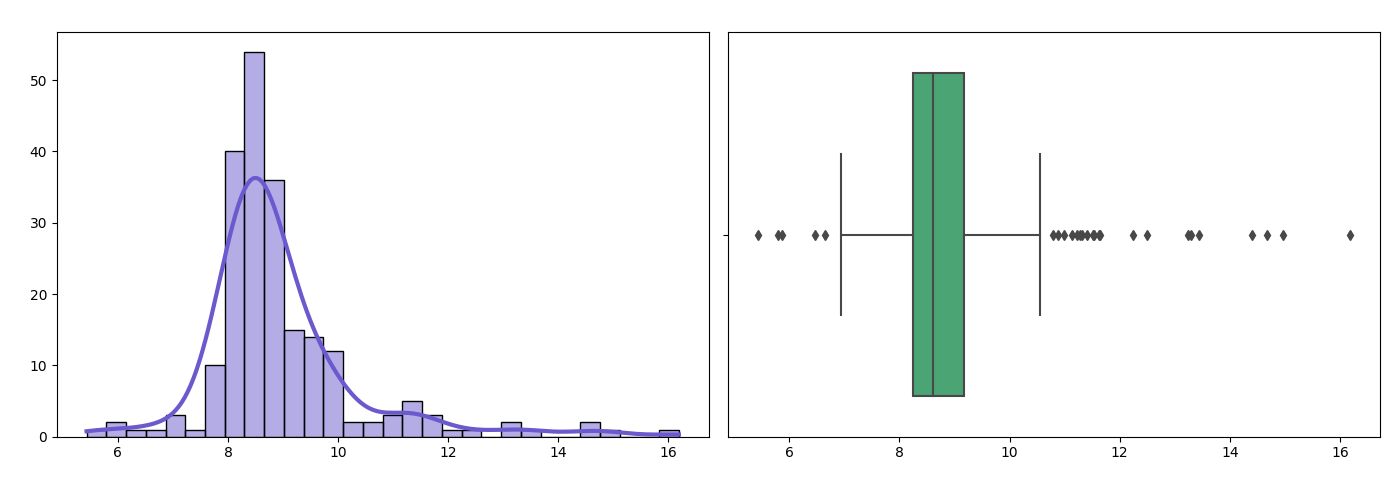

In [16]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Ca'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Ca'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


8. Ba(Barium)

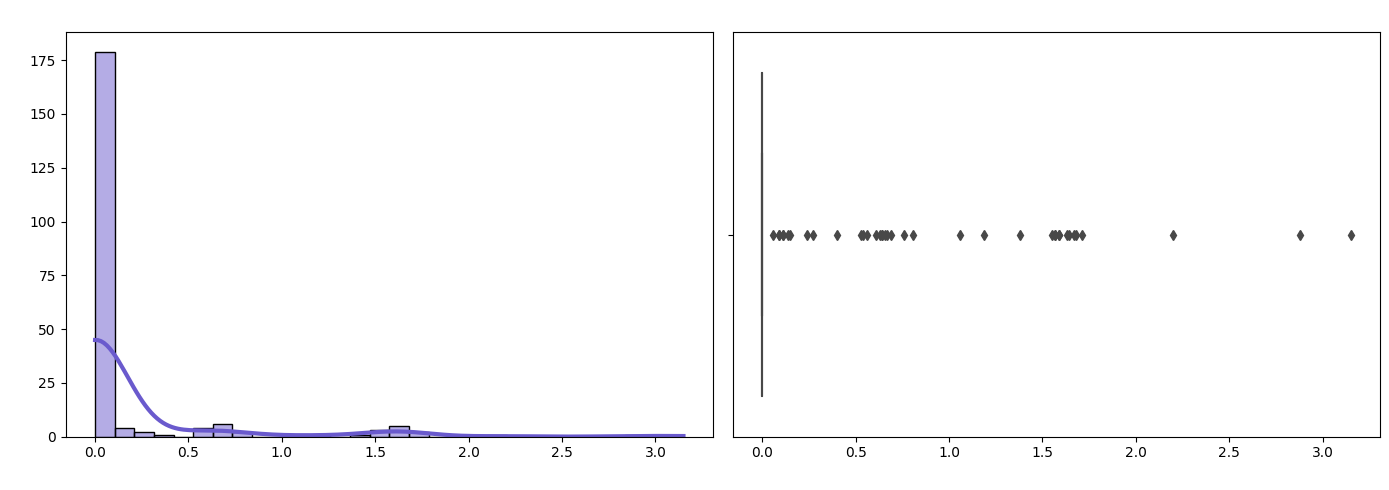

In [17]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Ba'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Ba'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


9. Fe (Iron)

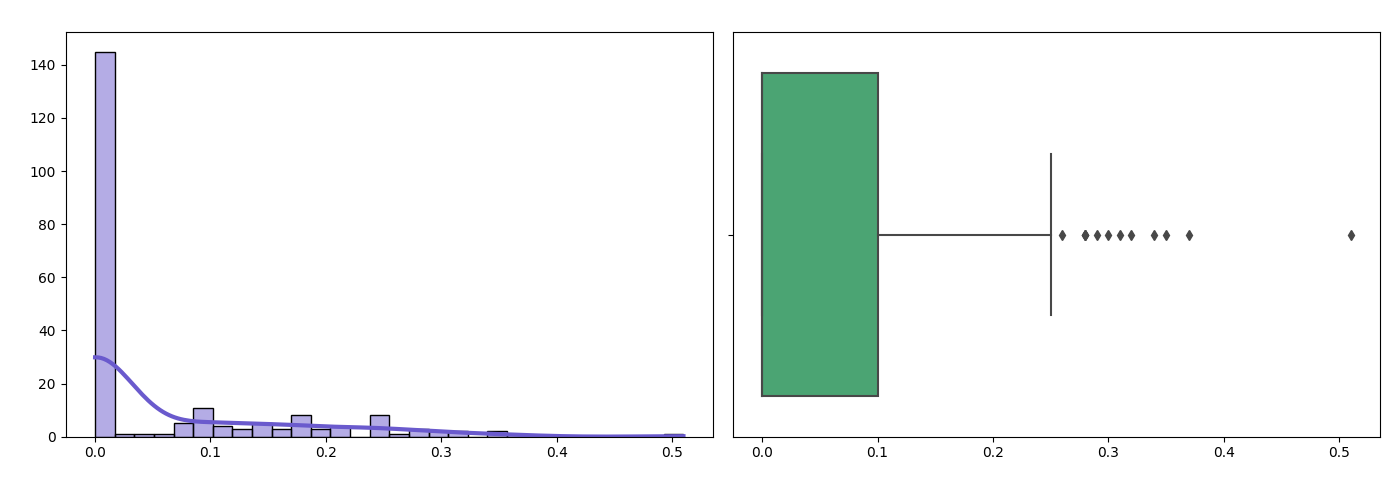

In [18]:

# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    glass['Fe'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Age", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=glass['Fe'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Age", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


10. Type

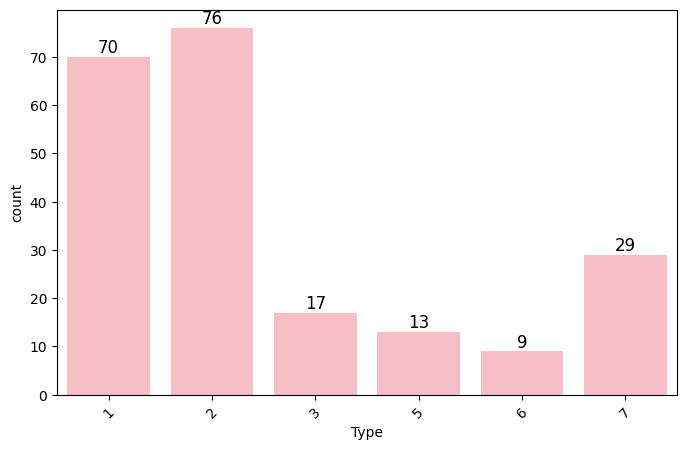

In [19]:
# Define dark pastel color for barplot
count_color = "#FFB6C1"   # Light Pink

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.countplot(x="Type", data=glass, color=count_color, ax=ax)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
    
plt.xticks(rotation=45)
plt.show()

#### <h3 style="color:midnightblue">Outlier handling</h3>


Random forest are not affected by outliers,hence we will not be treating the outliers.
- Bootstrap Sampling Reduces Outlier Influence 
- Tree-Based Models Are Robust to Outliers

#### <h3 style="color:midnightblue">Multivariate Analysis</h3>

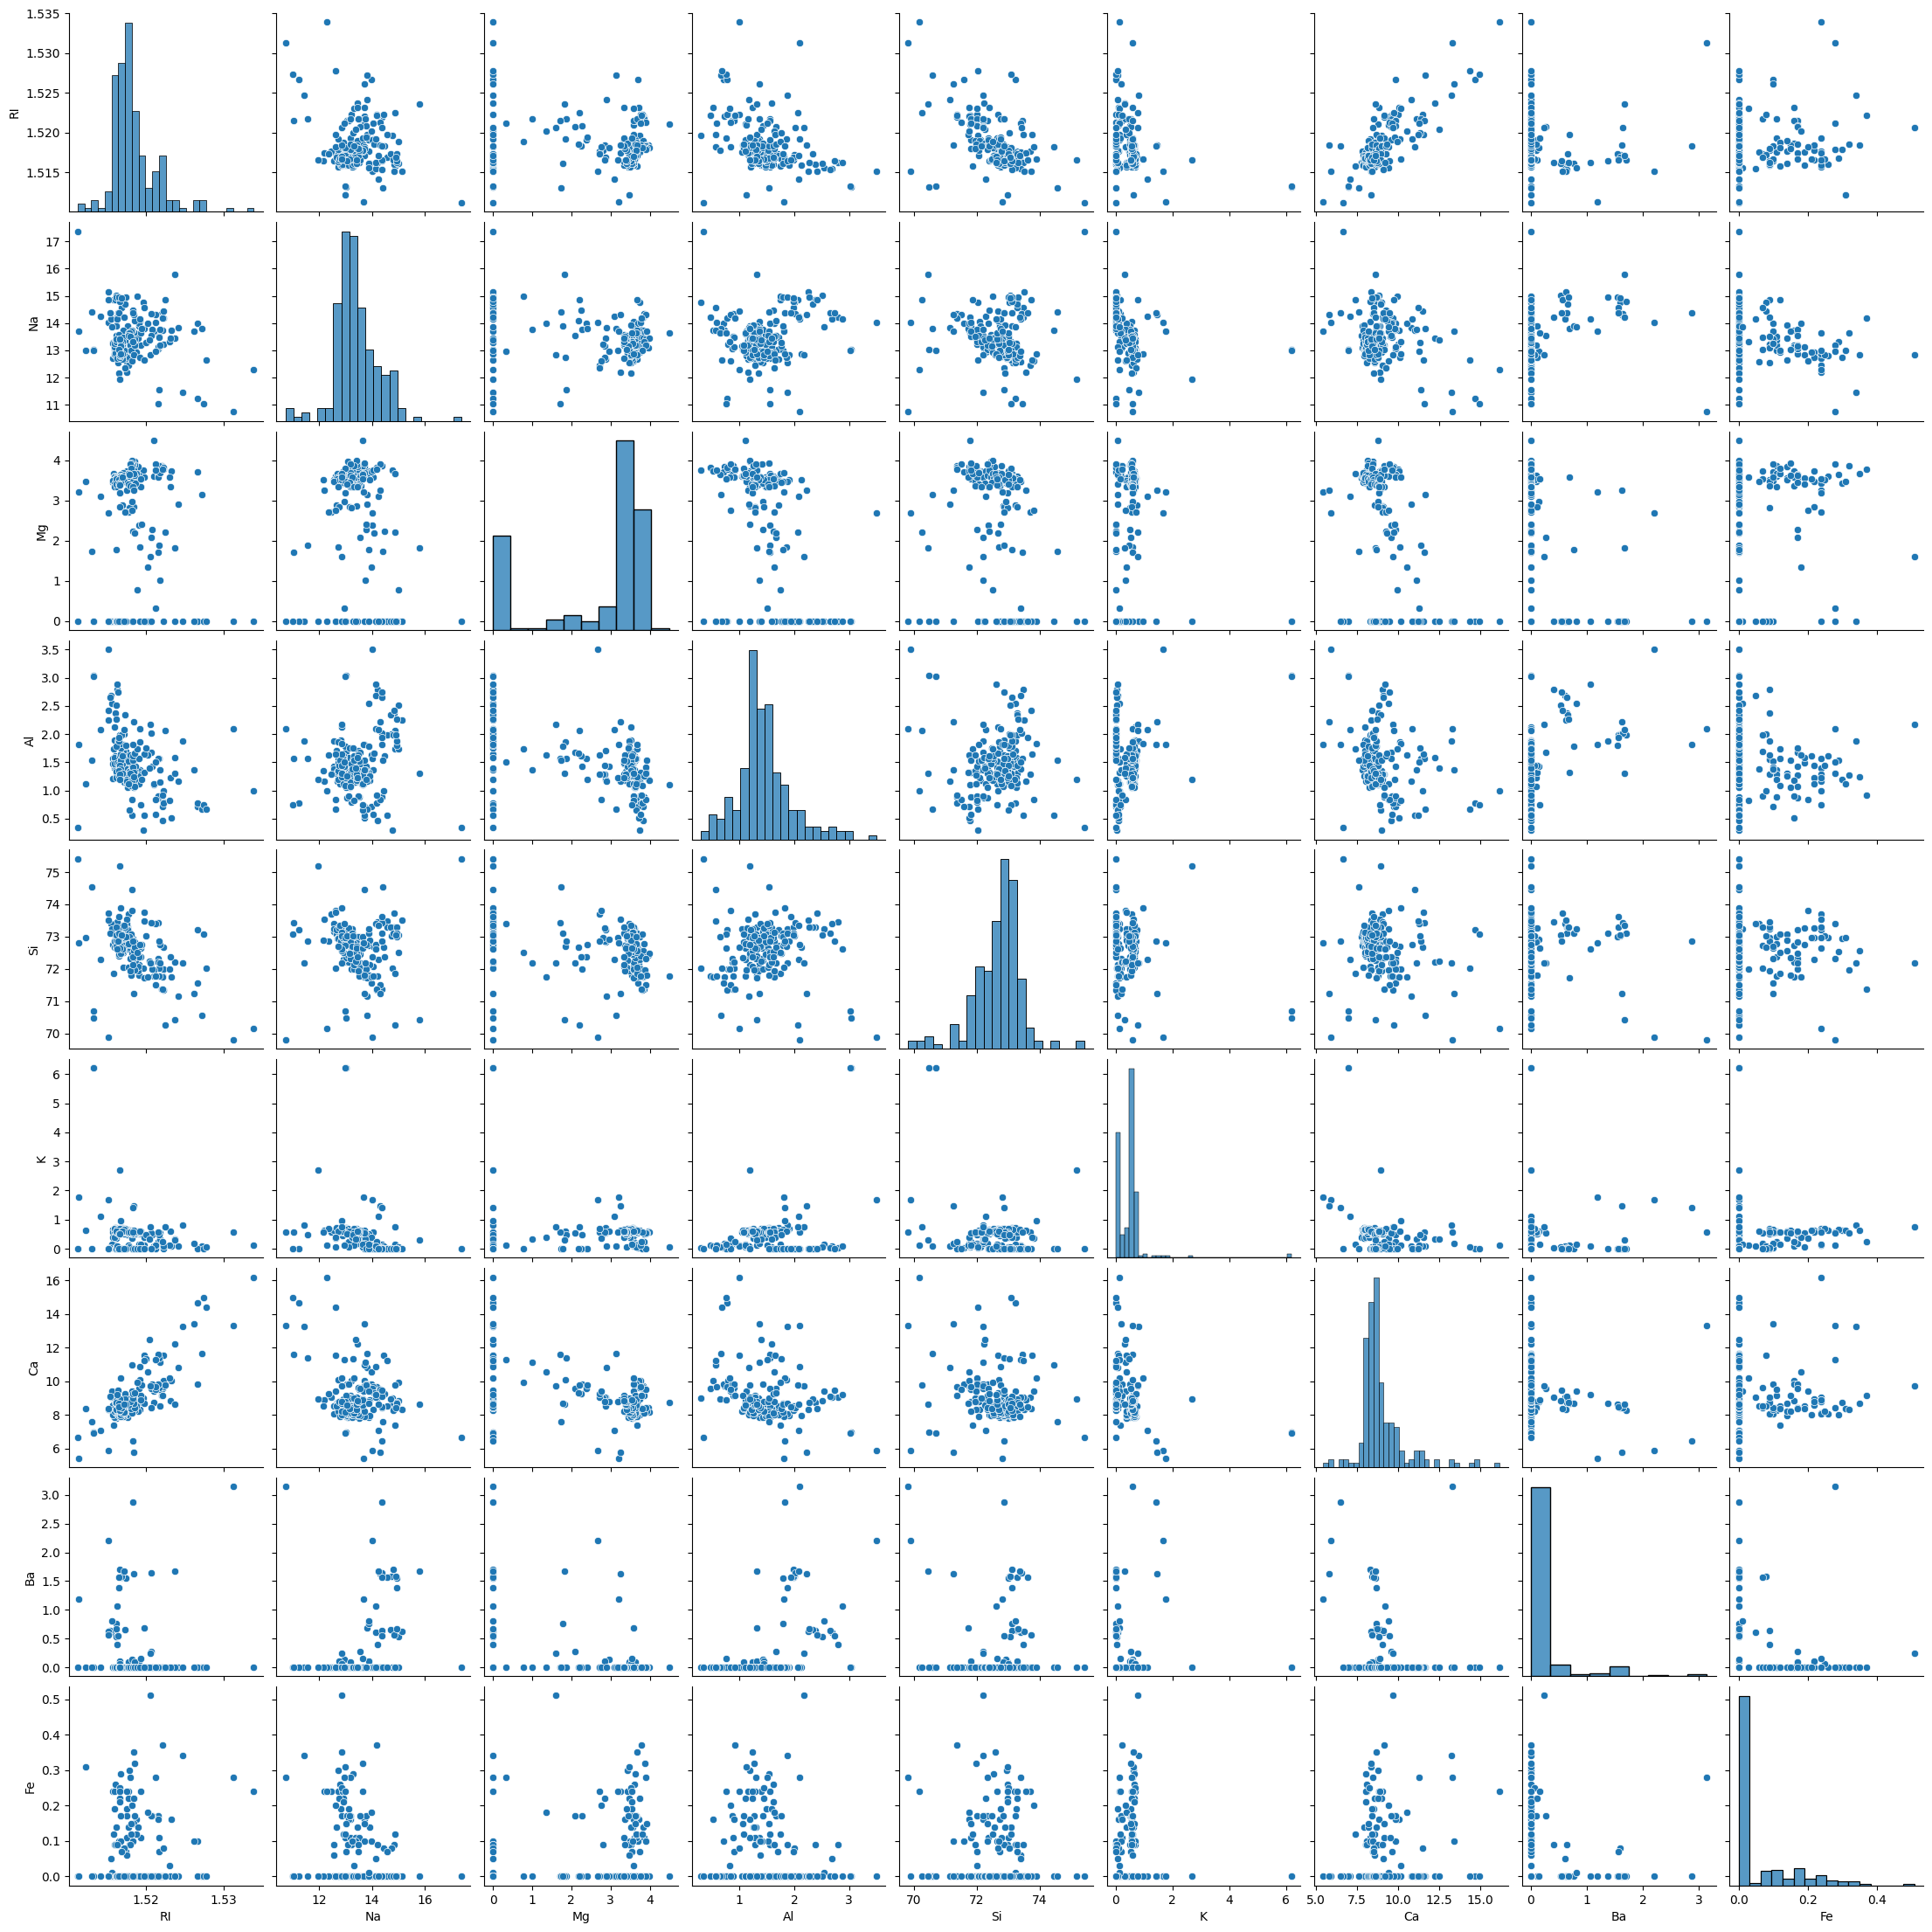

In [20]:
sns.pairplot(data=glass.iloc[:,:9], palette='Set2')

# Show the plot
plt.show()

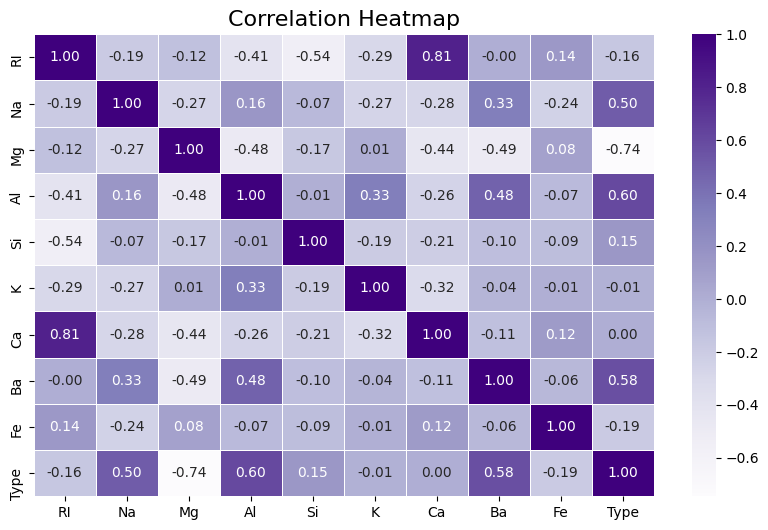

In [21]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size
correlation_matrix = glass.corr()  # Compute the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Purples", cbar=True, linewidths=0.5)

# Add a title for better interpretation
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

- Magnesium has negative correlation of 0.74 with target variable
- RI and Ca are strongly correlated with correlation coef: 81%
- Na, Al and Ba are other strongly correlated feature wuth target variable.

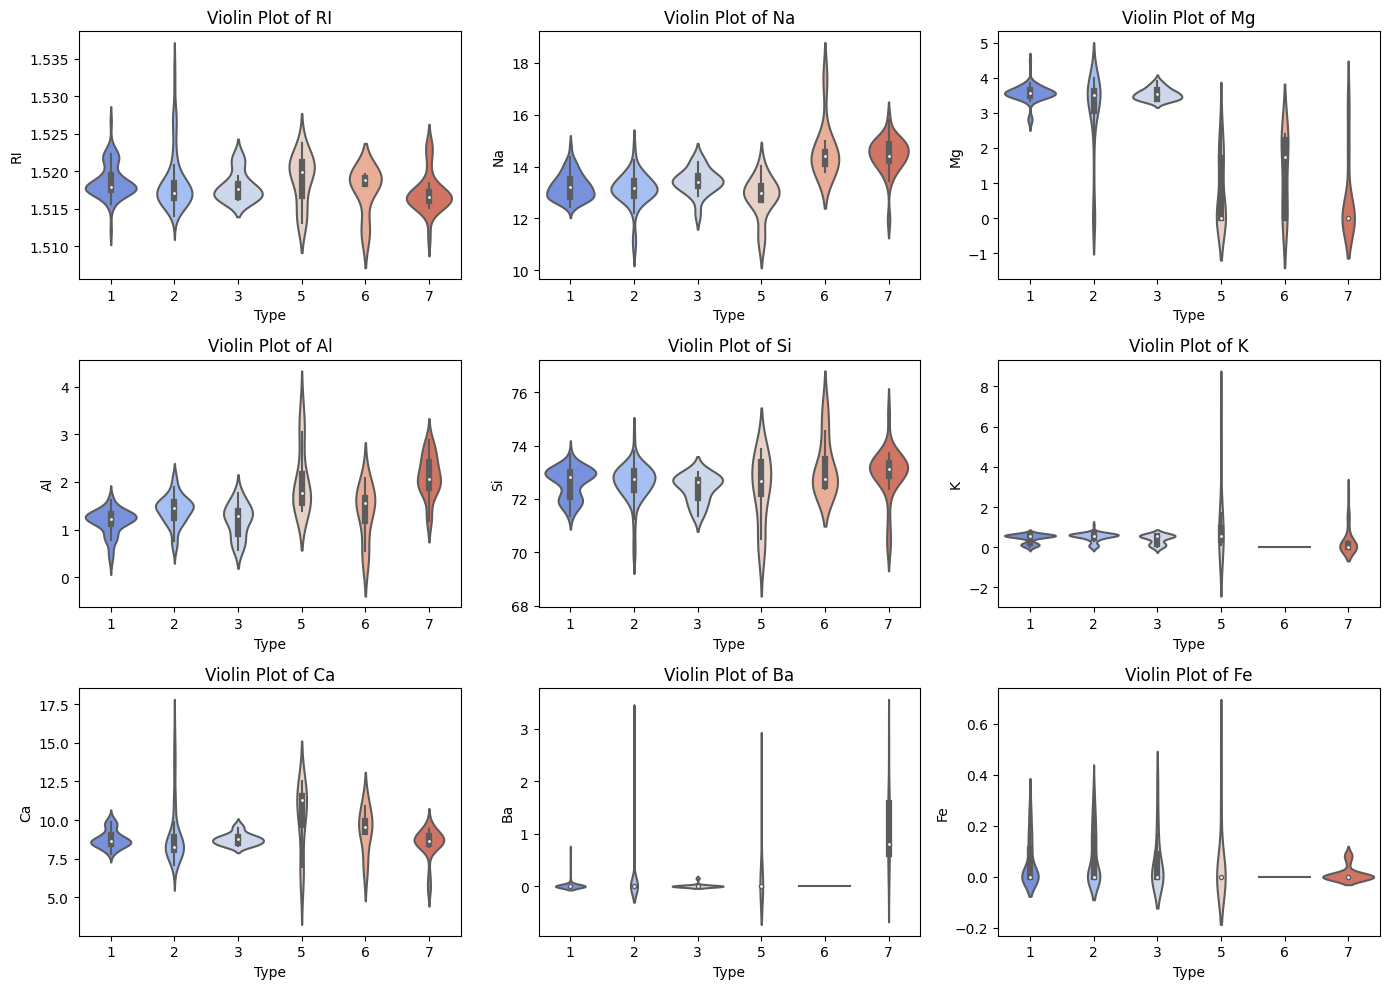

In [22]:
#  Violin Plots to Compare Feature Distributions by Glass Type
plt.figure(figsize=(14, 10))
for i, col in enumerate(glass.columns[:-1], 1):  
    plt.subplot(3, 3, i)
    sns.violinplot(x="Type", y=col, data=glass, palette="coolwarm")
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

- Ba, K, and Ca appear to be strong distinguishing features.
- Si and RI have relatively consistent distributions across types.
- Mg and Al have unique variations in specific glass types, indicating they may also contribute to classification.

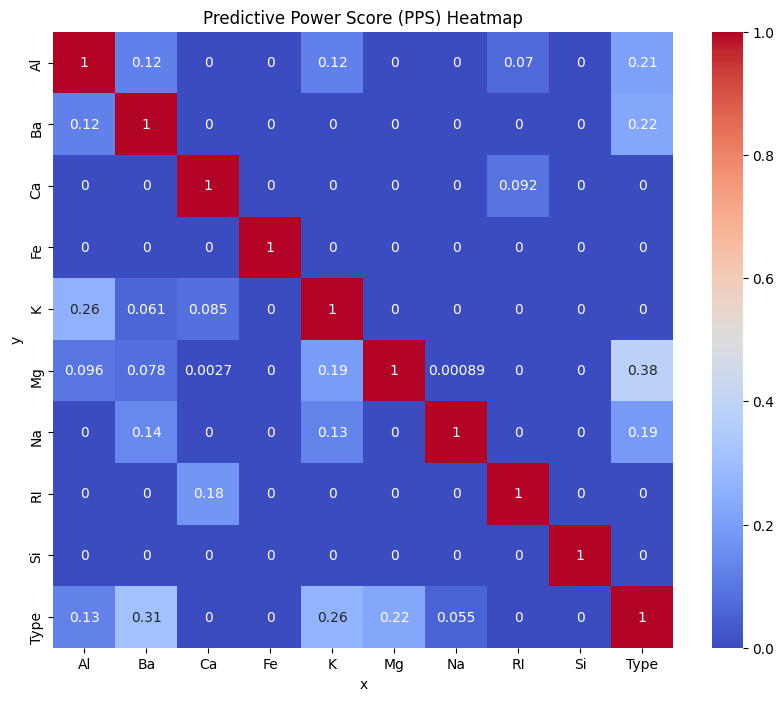

In [23]:

import ppscore as pps

# Compute PPS matrix
pps_matrix = pps.matrix(glass)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, cmap="coolwarm", annot=True)
plt.title("Predictive Power Score (PPS) Heatmap")
plt.show()


## <h2 style="color:purple">3. Data Preprocessing</h2>

In [60]:
scaler = StandardScaler()
X = glass.drop(columns=['Type'])
X_scaled = scaler.fit_transform(X)
y = glass["Type"]

In [61]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

We earlier saw that in the univariate analaysis of column "Type" that we did have some imbalance classes so will fix that using oversampling. <br>
**SMOTE will also deal with any ourtlierscaused by imbalanced classes**

In [62]:
# Handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [63]:
X_resampled.shape

(366, 9)

In [64]:
y_resampled.shape

(366,)

The stratify attribute in train_test_split() ensures that the train and test sets have the same proportion of each class as in the original dataset. This is especially important for imbalanced datasets, where some classes have significantly fewer samples than others.

## <h2 style="color:purple">4. Implement Random Forest Classifier</h2>

In [65]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

In [66]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           1       1.00      0.71      0.83        14
           2       0.79      0.73      0.76        15
           3       0.43      1.00      0.60         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.79        43
   macro avg       0.79      0.88      0.80        43
weighted avg       0.85      0.79      0.80        43

Confusion Matrix:
 [[10  2  2  0  0  0]
 [ 0 11  2  0  1  1]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [71]:

rf = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=2, n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

In [72]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           1       1.00      0.71      0.83        14
           2       0.79      0.73      0.76        15
           3       0.43      1.00      0.60         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.79        43
   macro avg       0.79      0.88      0.80        43
weighted avg       0.85      0.79      0.80        43

Confusion Matrix:
 [[10  2  2  0  0  0]
 [ 0 11  2  0  1  1]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


#### <h3 style="color:midnightblue">Training without scaled features and without resampling </h3>

In [34]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [74]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43

Confusion Matrix:
 [[12  1  1  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


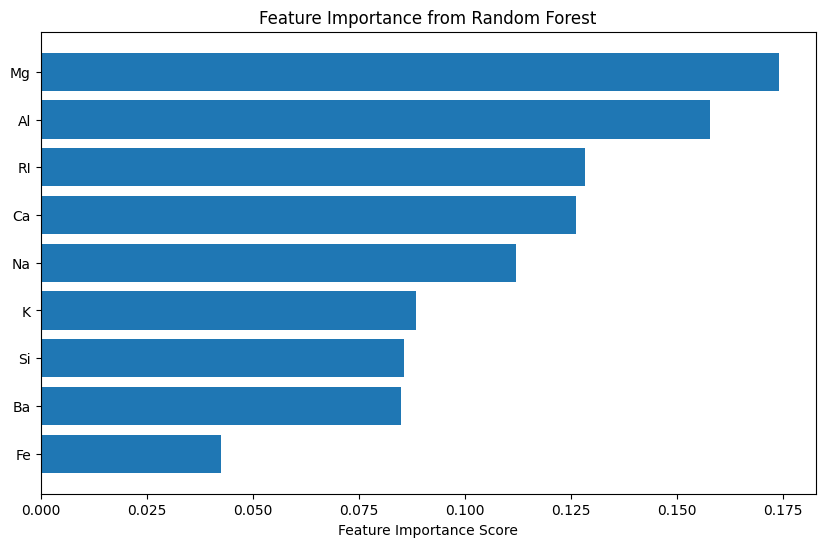

In [75]:
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]  # Sort features by importance
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Invert axis for better readability
plt.show()

#### <h3 style="color:midnightblue">Removing the least important feature</h3>

In [76]:
X = glass.drop(columns=['Fe','Type'])

In [77]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
# Handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [81]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [82]:
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.79      0.73      0.76        15
           3       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.84        43
   macro avg       0.88      0.86      0.86        43
weighted avg       0.85      0.84      0.84        43

Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


## <h2 style="color:purple">5. Bagging and boosting methods.</h2>

In [83]:
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

In [84]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [85]:
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [86]:
# Comparing Results
print("Bagging Performance:")
print(classification_report(y_test, y_pred_bagging))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Boosting (AdaBoost) Performance:")
print(classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Boosting (Gradient Boosting) Performance:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Bagging Performance:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.75      0.76        43
weighted avg       0.82      0.79      0.79        43

Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 2 12  0  0  1  0]
 [ 2  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
Boosting (AdaBoost) Performance:
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.42      0.33      0.37        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0

In [87]:
print("Bagging Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))
print("Boosting (AdaBoost) Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Boosting (Gradient Boosting) Performance:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Bagging Performance:
Confusion Matrix:
 [[12  2  0  0  0  0]
 [ 2 12  0  0  1  0]
 [ 2  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]
Boosting (AdaBoost) Performance:
Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 8  5  0  0  2  0]
 [ 3  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  3  0  0  0  3]]
Boosting (Gradient Boosting) Performance:
Confusion Matrix:
 [[11  2  0  0  0  1]
 [ 1 13  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]



1. **Bagging Performance:**
   - **Strong performance for Class 1 and 2:** Most predictions are correct.
   - **Class 3 and 5 are misclassified frequently**, reducing reliability.
   - **Accuracy (previously 0.79)**: Moderate, but some misclassification affects class balance.

2. **Boosting (AdaBoost) Performance:**
   - **Highly imbalanced predictions.**
   - **Severe misclassification in Class 3, 5, and 6**—shows complete failure in predicting those categories.
   - Most predictions are concentrated in **Class 1 and 2**.
   - **Accuracy (previously 0.53)**: **Worst model performance** with extreme bias.

3. **Boosting (Gradient Boosting) Performance:**
   - **Best confusion matrix distribution among all Boosting models.**
   - **Some misclassification in Class 1 and 2**, but overall, it correctly classifies most categories.
   - **Accuracy (previously 0.84)**: Strong, suggesting a reliable model.

4. **Random Forest (Previous Analysis):**
   - **Accuracy (0.84)**, performing at a similar level to Gradient Boosting.
   - **Balanced classification** with fewer misclassifications.
   - **Best recall for Class 1 and Class 2**, making it robust for those categories.

### **Final Model Recommendation:**
- **Gradient Boosting and Random Forest remain the best choices.**
- **Avoid AdaBoost** due to extreme misclassification.
- If interpretability is needed, **Random Forest is preferred**.
- If generalization is key, **Gradient Boosting is a good option**.

### Additional Notes:

#### 1. Explain Bagging and Boosting methods. How is it different from each other.


#### Bagging (Bootstrap Aggregating):

It trains multiple models (e.g., decision trees) independently on different subsets of data and then averages their predictions.
Reduces variance and prevents overfitting.
Example: Random Forest is a bagging method.
    
####Boosting:

It trains models sequentially, with each new model focusing on the errors made by the previous ones.
Improves weak models by reducing bias.
Example: AdaBoost, Gradient Boosting.
    
#### 2. Explain how to handle imbalance in the data.
    
Handling imbalanced data can be done using techniques like:

Resampling – Oversample the minority class (SMOTE) or undersample the majority class.
Class Weight Adjustment – Use weighted loss functions or set class_weight='balanced' in models like Random Forest.
Data Augmentation – Generate synthetic samples for the minority class.
Anomaly Detection – Treat minority class as an anomaly and use specialized models.

# <center><h2 style = "color:navy;">End of file</h2></center>